# Loan default

Develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimize the risk of losing money while lending to customers.


## Data description
- **ID** Id for each row
- **year** year when the loan was taken
- **loan_limit** if the loan limit is fixed or variable cf-confirm/fixed, ncf- not confirm/not fixed
- **Gender** gender of the applicant, can be male female, not specified, joint (in case of applling as a couple for home loan)
- **loan_type** type of loan (masked data ) type-1, type-2, type-3
- **loan_purpose** purpose of the loan (masked data ) p1,p2,p3,p4
- **business_or_commercial** if the loan is for sommercial establishment or personal establishment
- **loan_amount** amount of the loan
- **rate_of_interest** rate of interest for the loan
- **Upfront_charges** down payment done by the applicant
- **property_value** value of the property being constructed for which the loan is taken
- **occupancy_type** for the establishment
- **income** income of the applicant
- **credit_type** 'EXP' 'EQUI' 'CRIF' 'CIB'
- **Credit_Score** credit score of applicant
- **co-applicant_credit_type** credit type for co-applicant
- **age** age of applicant
- **LTV** lifetime value of the applicant
- **Region** region of the applicant
- **Status** defaulter(1) or normal(0)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/fintech/loan (1).csv')

In [ ]:
df.head()

,ID,year,loan_limit,Gender,loan_type,loan_purpose,business_or_commercial,loan_amount,rate_of_interest,Upfront_charges,property_value,occupancy_type,income,credit_type,Credit_Score,co-applicant_credit_type,age,LTV,Region,Status
0,24890,2019,cf,Sex Not Available,type1,p1,nob/c,116500,NaN,NaN,118000.0,pr,1740.0,EXP,758,CIB,25-34,98.728814,south,1
1,24891,2019,cf,Male,type2,p1,b/c,206500,NaN,NaN,NaN,pr,4980.0,EQUI,552,EXP,55-64,NaN,North,1
2,24892,2019,cf,Male,type1,p1,nob/c,406500,4.56,595.0,508000.0,pr,9480.0,EXP,834,CIB,35-44,80.019685,south,0
3,24893,2019,cf,Male,type1,p4,nob/c,456500,4.25,NaN,658000.0,pr,11880.0,EXP,587,CIB,45-54,69.376900,North,0
4,24894,2019,cf,Joint,type1,p1,nob/c,696500,4.00,0.0,758000.0,pr,10440.0,CRIF,602,EXP,25-34,91.886544,North,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 20 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        148670 non-null  int64  
 1   year                      148670 non-null  int64  
 2   loan_limit                145326 non-null  object 
 3   Gender                    148670 non-null  object 
 4   loan_type                 148670 non-null  object 
 5   loan_purpose              148536 non-null  object 
 6   business_or_commercial    148670 non-null  object 
 7   loan_amount               148670 non-null  int64  
 8   rate_of_interest          112231 non-null  float64
 9   Upfront_charges           109028 non-null  float64
 10  property_value            133572 non-null  float64
 11  occupancy_type            148670 non-null  object 
 12  income                    139520 non-null  float64
 13  credit_type               148670 non-null  o

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,148670.0,99224.500000,42917.476598,24890.000000,62057.25000,99224.50000,136391.750000,173559.00
year,148670.0,2019.000000,0.000000,2019.000000,2019.00000,2019.00000,2019.000000,2019.00
loan_amount,148670.0,331117.743997,183909.310127,16500.000000,196500.00000,296500.00000,436500.000000,3576500.00
rate_of_interest,112231.0,4.045476,0.561391,0.000000,3.62500,3.99000,4.375000,8.00
Upfront_charges,109028.0,3224.996127,3251.121510,0.000000,581.49000,2596.45000,4812.500000,60000.00
property_value,133572.0,497893.465696,359935.315562,8000.000000,268000.00000,418000.00000,628000.000000,16508000.00
income,139520.0,6957.338876,6496.586382,0.000000,3720.00000,5760.00000,8520.000000,578580.00
Credit_Score,148670.0,699.789103,115.875857,500.000000,599.00000,699.00000,800.000000,900.00
LTV,133572.0,72.746457,39.967603,0.967478,60.47486,75.13587,86.184211,7831.25
Status,148670.0,0.246445,0.430942,0.000000,0.00000,0.00000,0.000000,1.00


In [ ]:
df.shape

(148670, 20)

In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
148665,False
148666,False
148667,False
148668,False


In [ ]:
df.isna().sum()

,0
ID,0
year,0
loan_limit,3344
Gender,0
loan_type,0
loan_purpose,134
business_or_commercial,0
loan_amount,0
rate_of_interest,36439
Upfront_charges,39642


# Handling Null values

In [ ]:
df['loan_limit'].unique()

array(['cf', nan, 'ncf'], dtype=object)

In [ ]:
df['loan_limit'].fillna('unknown', inplace=True)

In [ ]:
df['loan_purpose'].unique()

array(['p1', 'p4', 'p3', 'p2', nan], dtype=object)

In [ ]:
df['loan_purpose'].fillna('unknown', inplace=True)

In [ ]:
df['rate_of_interest'].unique()

array([  nan, 4.56 , 4.25 , 4.   , 3.99 , 4.5  , 4.125, 4.875, 3.49 ,
       4.375, 3.625, 3.175, 2.99 , 4.99 , 5.25 , 3.75 , 3.375, 3.25 ,
       2.75 , 3.875, 3.5  , 4.75 , 3.125, 5.19 , 4.49 , 2.875, 5.125,
       4.625, 3.7  , 5.   , 3.   , 5.375, 4.18 , 3.69 , 5.5  , 3.65 ,
       5.75 , 3.775, 3.56 , 5.625, 6.24 , 4.475, 3.4  , 2.925, 3.925,
       5.74 , 5.875, 3.45 , 4.275, 2.975, 3.725, 2.85 , 3.675, 3.55 ,
       3.93 , 2.375, 3.85 , 3.525, 2.725, 2.5  , 2.6  , 5.99 , 5.49 ,
       8.   , 3.025, 3.8  , 2.775, 3.05 , 3.325, 6.   , 3.825, 3.15 ,
       3.1  , 4.4  , 3.3  , 4.05 , 6.75 , 4.025, 3.475, 2.625, 3.225,
       3.575, 4.175, 3.9  , 2.95 , 3.075, 3.275, 7.   , 3.425, 5.69 ,
       5.3  , 3.2  , 3.6  , 2.65 , 3.35 , 7.75 , 4.225, 2.25 , 3.95 ,
       4.7  , 2.125, 2.8  , 0.   , 4.2  , 3.975, 4.075, 2.675, 7.375,
       4.44 , 4.865, 4.15 , 6.125, 4.1  , 6.375, 6.5  , 4.35 , 4.3  ,
       6.25 , 2.475, 4.425, 4.525, 7.5  , 4.55 , 4.95 , 4.82 , 6.875,
       4.325, 2.575,

In [ ]:
df['rate_of_interest'].fillna(df['rate_of_interest'].median(), inplace=True)
df['rate_of_interest'] = df['rate_of_interest'].round(2)

In [ ]:
df['Upfront_charges'].unique()

array([    nan,  595.  ,    0.  , ..., 3113.06, 1226.64, 4323.33])

In [ ]:
df['Upfront_charges'].fillna(0, inplace=True)

In [ ]:
df['property_value'].unique()

array([1.1800e+05,        nan, 5.0800e+05, 6.5800e+05, 7.5800e+05,
       1.0080e+06, 4.3800e+05, 3.0800e+05, 4.7800e+05, 6.8800e+05,
       1.6800e+05, 7.0800e+05, 2.5800e+05, 2.9800e+05, 1.3800e+05,
       3.6800e+05, 5.9800e+05, 7.4800e+05, 5.5800e+05, 1.9800e+05,
       4.4800e+05, 4.2800e+05, 5.6800e+05, 2.1800e+05, 4.6800e+05,
       2.2800e+05, 3.1800e+05, 3.3800e+05, 5.3800e+05, 4.0800e+05,
       1.0180e+06, 1.1080e+06, 4.1800e+05, 5.2800e+05, 2.4800e+05,
       1.5080e+06, 6.0800e+05, 6.6800e+05, 8.0800e+05, 9.4800e+05,
       1.2800e+05, 2.3800e+05, 7.1800e+05, 8.8800e+05, 1.4800e+05,
       6.2800e+05, 9.2800e+05, 2.0800e+05, 1.1980e+06, 1.8800e+05,
       5.8800e+05, 1.3080e+06, 6.7800e+05, 3.5800e+05, 2.8800e+05,
       2.0080e+06, 5.7800e+05, 3.4080e+06, 3.4800e+05, 8.8000e+04,
       4.9800e+05, 8.1800e+05, 7.6800e+05, 3.8800e+05, 6.1800e+05,
       8.9800e+05, 2.7800e+05, 9.7800e+05, 1.7080e+06, 8.5800e+05,
       4.5800e+05, 6.3800e+05, 1.2080e+06, 6.4800e+05, 9.0800e

In [ ]:
df.dropna(subset=['property_value'], inplace=True)

In [ ]:
df['income'].fillna(df['income'].median(), inplace=True)

In [ ]:
df['age'].unique()

array(['25-34', '35-44', '45-54', '55-64', '65-74', '>74', '<25', nan],
      dtype=object)

In [ ]:
df['age'].value_counts()

,count
age,
45-54,31399
35-44,29612
55-64,29304
65-74,18397
25-34,17232
>74,6240
<25,1188


In [ ]:
df['age'].fillna(df['age'].mode()[0], inplace=True)

In [ ]:
df['LTV'].unique()

array([ 98.72881356,  80.01968504,  69.3768997 , ..., 151.8145161 ,
        41.49550706,  32.80201342])

In [ ]:
median_value = df['LTV'].median()
df['LTV'].fillna(median_value, inplace=True)

In [ ]:
df.isna().sum()

,0
ID,0
year,0
loan_limit,0
Gender,0
loan_type,0
loan_purpose,0
business_or_commercial,0
loan_amount,0
rate_of_interest,0
Upfront_charges,0


In [ ]:
df.describe(include='number').columns

Index(['ID', 'year', 'loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Status'],
      dtype='object')

##  Distributions of Numerical columns in  loan default data




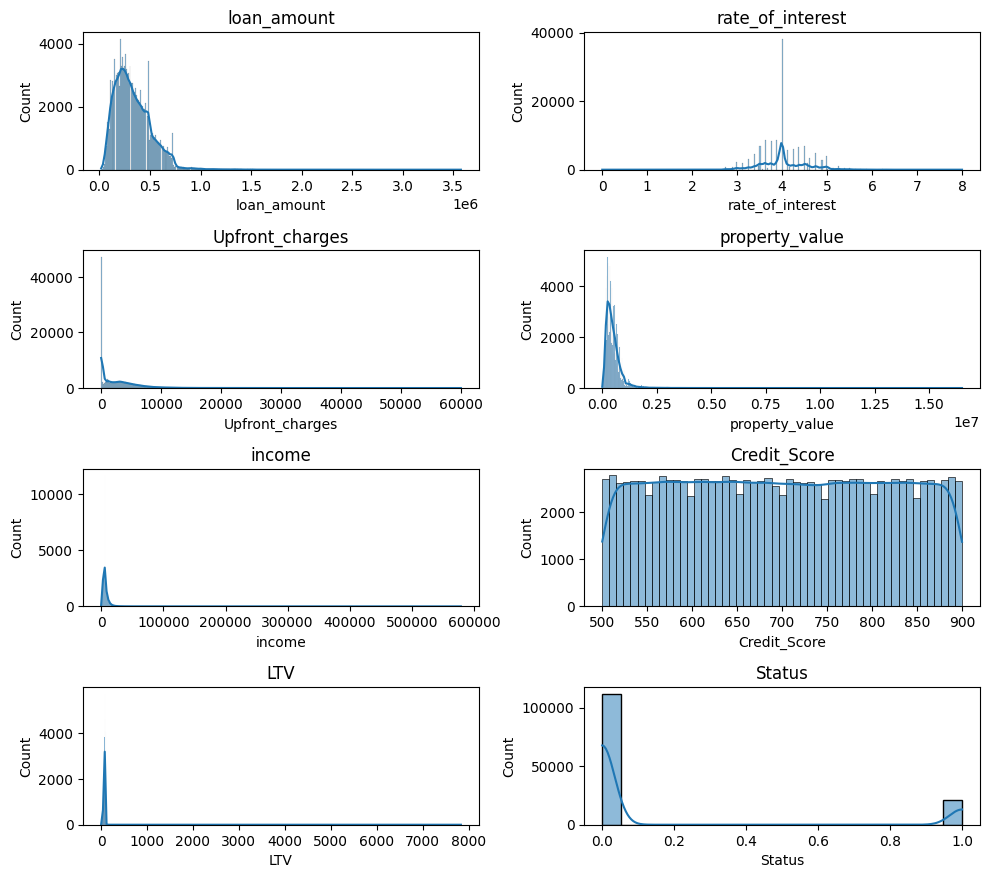

In [ ]:
numericals_feature = ['loan_amount', 'rate_of_interest', 'Upfront_charges',
       'property_value', 'income', 'Credit_Score', 'LTV', 'Status',
      ]
plt.figure(figsize=(10,15))

for i in range(1, len(numericals_feature) + 1):
    plt.subplot(7, 2, i)
    sns.histplot(df[numericals_feature[i-1]], kde=True)
    plt.title(numericals_feature[i-1])

plt.tight_layout()
plt.show()

**Observations**

**Loan Amount:**
* The distribution is skewed to the right, indicating that most loans in the dataset are for smaller amounts.

**Rate of Interest:**
* The rate of interest shows a relatively normal distribution graph.

**Upfront Charges:**
* Most upfront charges are concentrated at the lower end of the scale, with a small number of loans having higher upfront fees.

**Property Value:**
* Property values have a right-skewed distribution, indicating that lower-valued properties are more common in the dataset.

**Income:**
* The income distribution is heavily right-skewed, meaning the majority of borrowers have lower incomes.

**Credit Score:**
* Credit scores are clustered around a middle range, with fewer borrowers having extremely low or extremely high credit scores.

**Loan-to-Value (LTV) Ratio:**
* LTV ratio shows a skew toward higher values, suggesting that many borrowers are taking loans that are a high percentage of the property value.



## Distribution of Loan Amount

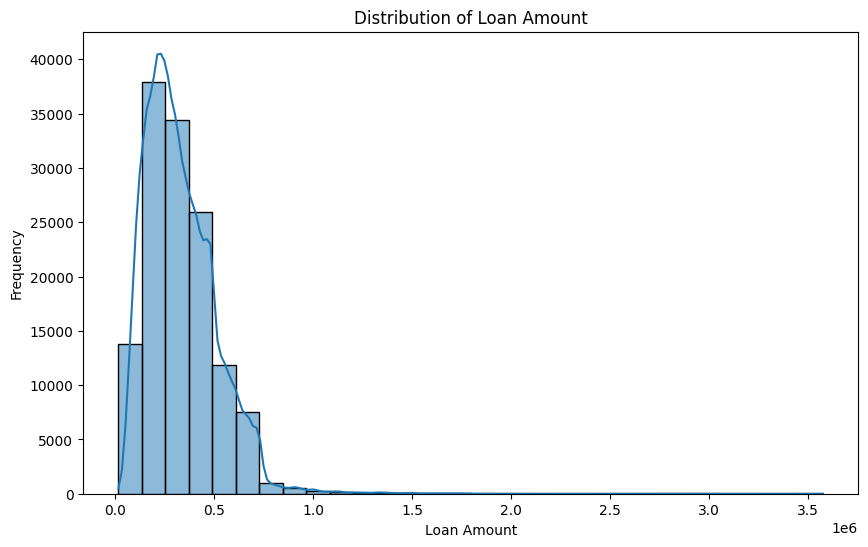

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['loan_amount'], bins=30, kde=True)
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


**Observations:**
* The distribution of loan amounts is skewed to the right, indicating that most loans in the dataset are relatively small, with fewer loans at higher amounts.

## Distribution of Rate of Interest



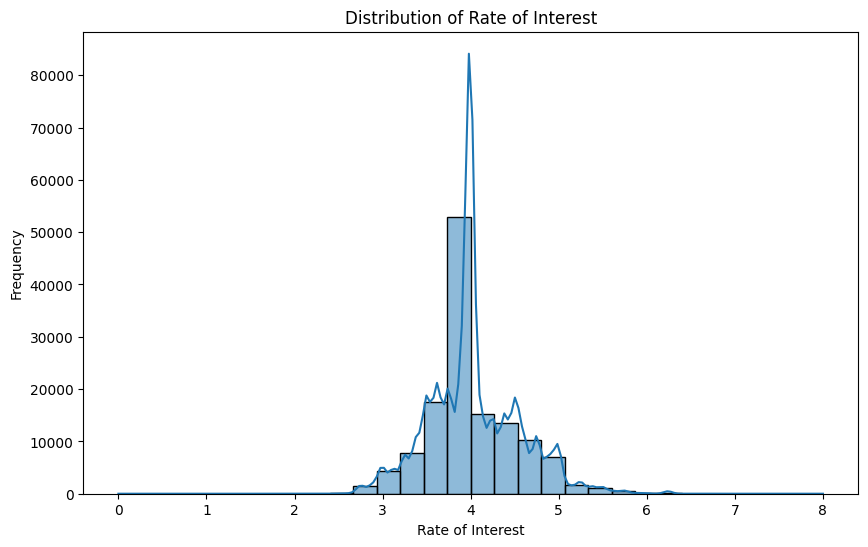

In [ ]:
# Plotting the distribution of interest rates
plt.figure(figsize=(10, 6))
sns.histplot(df['rate_of_interest'].dropna(), bins=30, kde=True)
plt.title('Distribution of Rate of Interest')
plt.xlabel('Rate of Interest')
plt.ylabel('Frequency')
plt.show()


**Observations:**
* The distribution of interest rates appears to follow a  normal distribution, with a peak at the center.

**Insights:**
* The majority of loans are issued within a specific range of interest rates, suggesting that lenders tend to offer standardized rates to a broad segment of borrowers.

## Loan Type Distribution

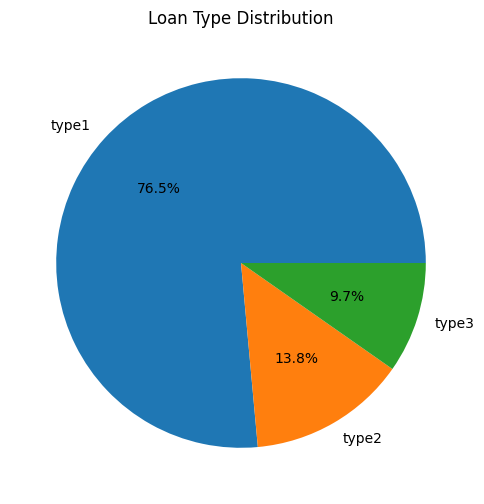

In [ ]:
loan_type_counts = df['loan_type'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(loan_type_counts, labels=loan_type_counts.index, autopct='%1.1f%%')
plt.title('Loan Type Distribution')
plt.show()

## Age Distribution of Applicants

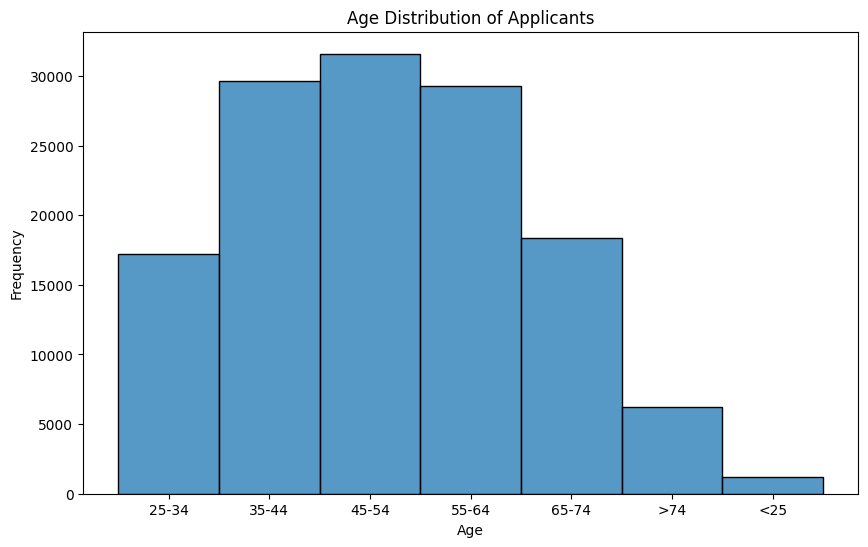

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=10)
plt.title('Age Distribution of Applicants')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Correlation Heatmap of Loan Numerical Features

In [ ]:
data =  df[numericals_feature].corr()
data

,loan_amount,rate_of_interest,Upfront_charges,property_value,income,Credit_Score,LTV,Status
loan_amount,1.000000,-0.131175,0.073676,0.734249,0.432827,0.003527,0.038869,-0.046864
rate_of_interest,-0.131175,1.000000,-0.064206,-0.105058,-0.015760,-0.001349,-0.001731,-0.036913
Upfront_charges,0.073676,-0.064206,1.000000,0.052805,0.042566,-0.002853,-0.035831,-0.360138
property_value,0.734249,-0.105058,0.052805,1.000000,0.410990,0.002430,-0.215102,-0.048864
income,0.432827,-0.015760,0.042566,0.410990,1.000000,0.000934,-0.035852,-0.063288
Credit_Score,0.003527,-0.001349,-0.002853,0.002430,0.000934,1.000000,-0.005533,0.003776
LTV,0.038869,-0.001731,-0.035831,-0.215102,-0.035852,-0.005533,1.000000,0.038895
Status,-0.046864,-0.036913,-0.360138,-0.048864,-0.063288,0.003776,0.038895,1.000000


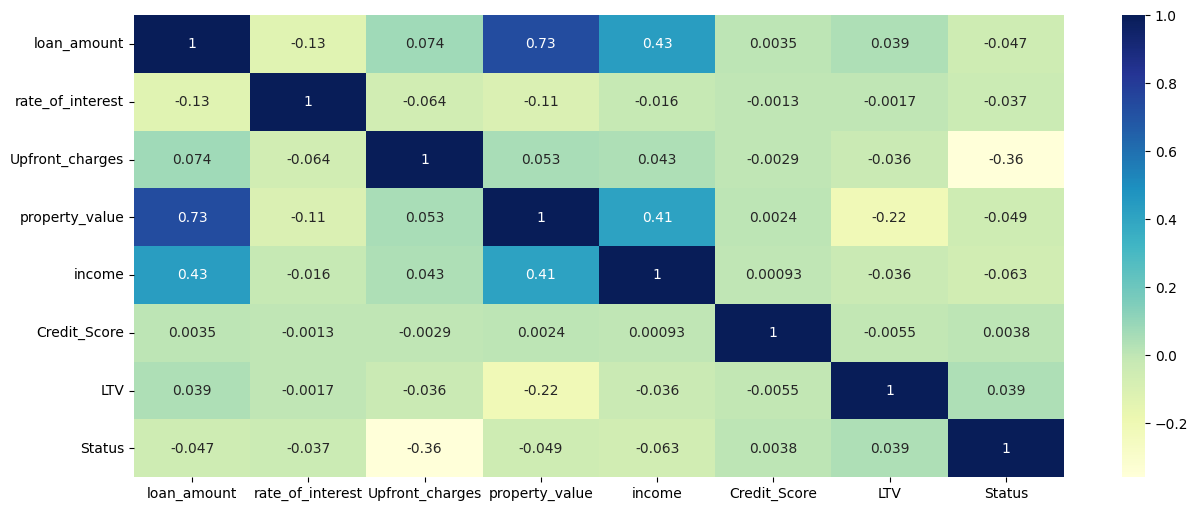

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(data, cmap="YlGnBu", annot=True)
plt.show()

**Observation:**
- Higher loan amounts are generally tied to higher property values and incomes, while smaller loan amounts tend to correlate slightly with defaults.
- Higher upfront charges seem to reduce the likelihood of defaults, indicating that charging more upfront might reduce risk.
- LTV ratios and income are also important considerations for understanding default risks, though their direct correlation with defaults is relatively low.

## Property Value vs. Loan Amount

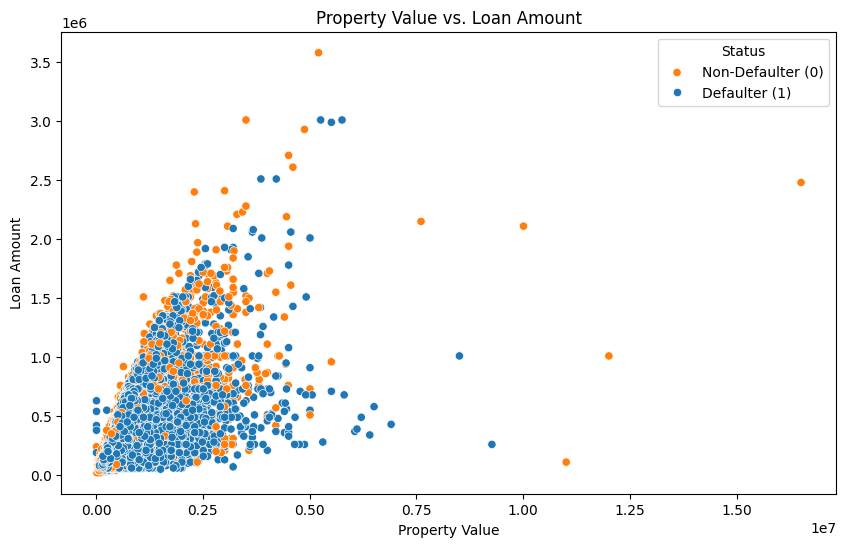

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='property_value', y='loan_amount', hue='Status', data=df)
plt.title('Property Value vs. Loan Amount')
plt.xlabel('Property Value')
plt.ylabel('Loan Amount')
plt.legend(title='Status', labels=['Non-Defaulter (0)', 'Defaulter (1)'])
plt.show()

**Observations:**

*   The plot shows a positive correlation between property value and loan amount which  means that higher property values are generally associated with larger loans.
*   A significant cluster of loans with lower property values and loan amounts is observed. This indicates that most loans in the dataset are for lower-valued properties.




**Insights:**

*   Most loans are concentrated in the lower range for both property value and loan amount. This suggests that the majority of applicants in the dataset are dealing with moderately priced properties, and their loan amounts reflect that.




## Income vs Loan Amount

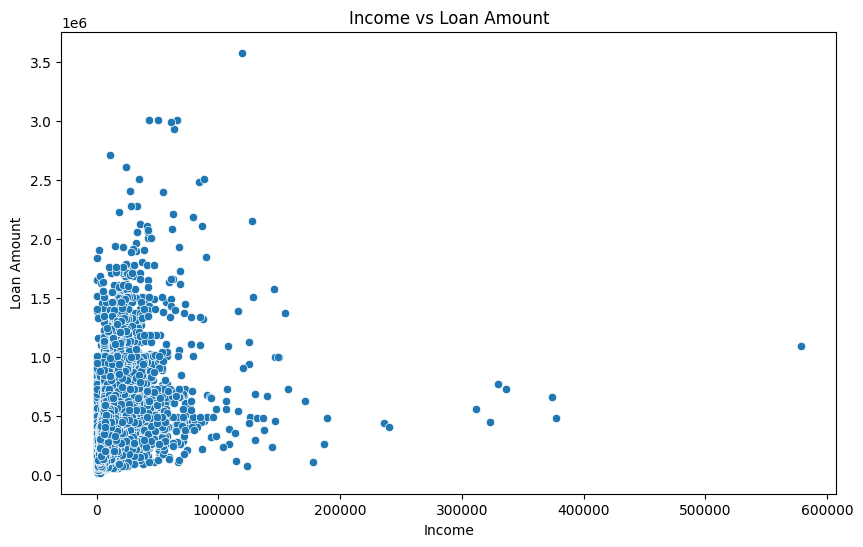

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='loan_amount', data=df, palette='Set1')
plt.title('Income vs Loan Amount')
plt.xlabel('Income')
plt.ylabel('Loan Amount')
plt.show()

**Observation**:
-  Most of the data points are concentrated where the income is between 0 and 100,000. This suggests that a large portion of individuals  have incomes on the lower end.
- There are a few outliers where individuals/entities with very high loan amounts (above 2 million) exist, even though their income levels remain relatively low (below 100,000).

**Insights**:
- The concentration of data at lower incomes with relatively lower loan amounts could indicate that lending institutions are conservative in lending large sums to individuals with lower incomes.
- The scatter plot suggests a positive relationship between income and loan amount, but this relationship is not linear. Most of the loan amounts are relatively low and tend to cluster around individuals with lower incomes.
- The presence of outliers indicates that some individuals with lower incomes might still get higher loans, possibly due to other factors like credit history, collateral, or loan types.

## Upfront Charges vs Loan Amount

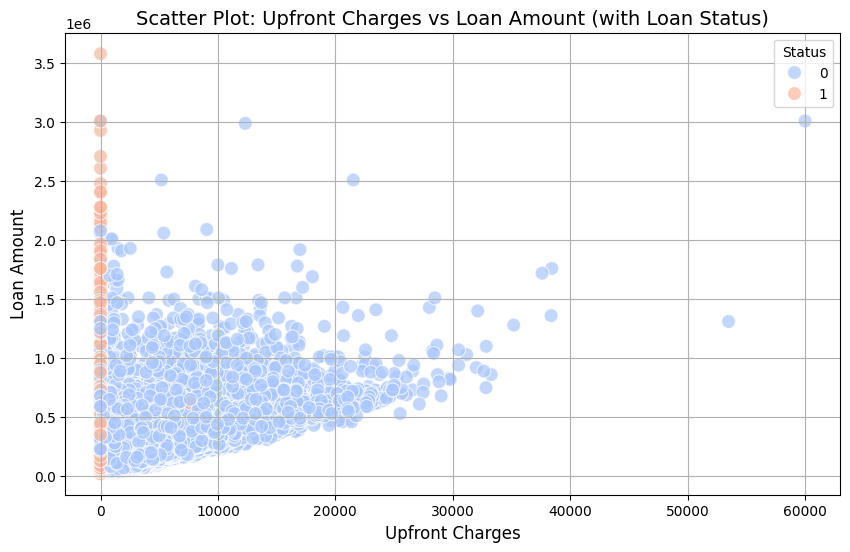

In [ ]:
plt.figure(figsize=(10, 6))

# Scatter Plot: Upfront Charges vs Loan Amount with Status Hue
sns.scatterplot(x='Upfront_charges', y='loan_amount', hue='Status', data=df, palette='coolwarm', s=100, alpha=0.7)

# Setting title and labels
plt.title('Scatter Plot: Upfront Charges vs Loan Amount (with Loan Status)', fontsize=14)
plt.xlabel('Upfront Charges', fontsize=12)
plt.ylabel('Loan Amount', fontsize=12)

plt.grid(True)
plt.show()

**Observations:**
* A majority of the loans, especially for smaller amounts, have very low upfront charges. Most data points are clustered near the lower left, with low loan amounts and low upfront charges.


**Insights:**
* Most loans in the dataset have small upfront charges, particularly for lower loan amounts. This suggests that upfront charges are kept minimal for the majority of loans, likely to make them more attractive to borrowers.



## Loan Amount vs. Loan Status

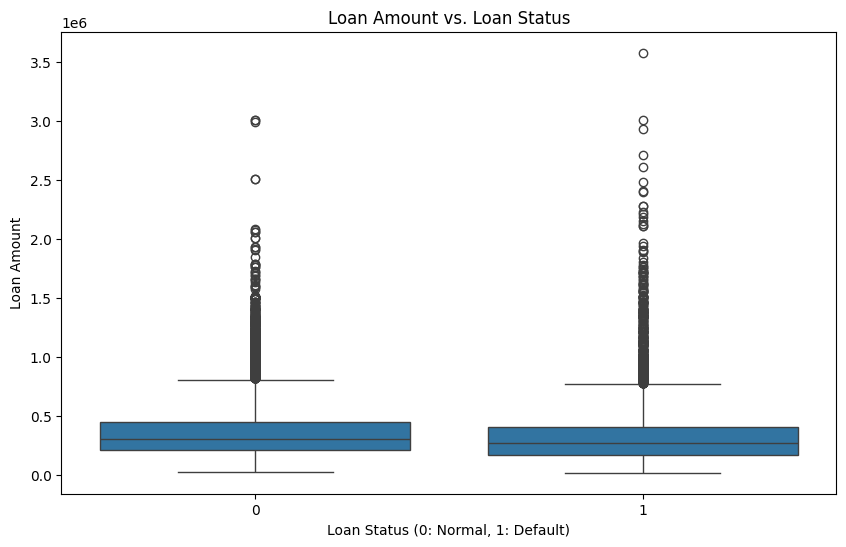

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Status', y='loan_amount')
plt.title('Loan Amount vs. Loan Status')
plt.xlabel('Loan Status (0: Normal, 1: Default)')
plt.ylabel('Loan Amount')
plt.show()

**Observations:**
* The interquartile ranges (IQR) for both loan statuses are also similar, suggesting that the majority of loan amounts are distributed within a common range.

**Insights:**
* Borrowers with smaller loan amounts appear more prone to default, which could be due to factors such as higher interest rates or shorter repayment periods associated with small loans.

# Hypothesis Testing


# Relationship Between Loan Purpose and Status


In [ ]:
pd.crosstab(df['loan_purpose'], df['Status'], margins=True, margins_name="Total",normalize=True)

Status,0,1,Total
loan_purpose,,,
p1,0.191612,0.033705,0.225317
p2,0.016403,0.005563,0.021966
p3,0.313958,0.068031,0.381989
p4,0.316002,0.053851,0.369853
unknown,0.000741,0.000135,0.000876
Total,0.838716,0.161284,1.000000


## Finding if there loan_purpose effects the status
  - Null Hypothesis : Loan purpose is independent of default status.
  - Alternate Hypothesis : Loan purpose is dependent of default status.

In [ ]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['loan_purpose'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=410.31390454701994, pvalue=1.6431064055139357e-87, dof=4, expected_freq=array([[2.52420027e+04, 4.85399730e+03],
       [2.46079332e+03, 4.73206675e+02],
       [4.27938166e+04, 8.22918343e+03],
       [4.14342576e+04, 7.96774239e+03],
       [9.81297952e+01, 1.88702048e+01]]))

In [ ]:
sigma = 0.05
if p<sigma:
  print('Reject the null hypothesis')
else:
  print('Accept the null hypothesis')

Reject the null hypothesis


Hence there is a dependence between loan purpose and status

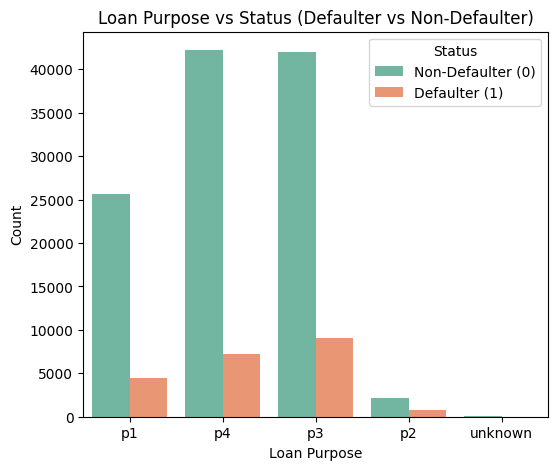

In [ ]:
plt.figure(figsize=(6, 5))
sns.countplot(x='loan_purpose', hue='Status', data=df, palette='Set2')
plt.title('Loan Purpose vs Status (Defaulter vs Non-Defaulter)')
plt.xlabel('Loan Purpose')
plt.ylabel('Count')
plt.legend(title='Status', labels=['Non-Defaulter (0)', 'Defaulter (1)'])
plt.show()

- p3 and p4 are 2 common loan purpose which are covering most of the loans.
- p3 and p4 also has have highest default rates among the available different loan purpose.

## Relationship between Age group and status


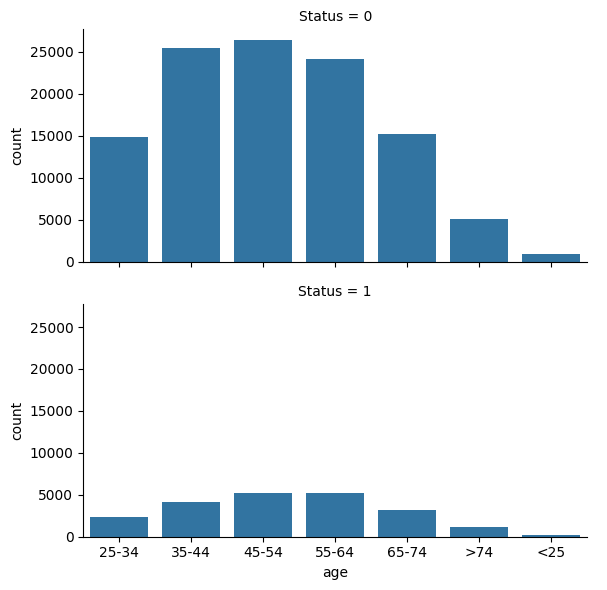

In [ ]:
sns.catplot(x='age', row = 'Status',
            kind='count', data=df,
            height = 3, aspect = 2)
plt.show()

**Observations**

- Loan  status varies across age groups, with some groups having higher normal rates and others showing more default rates.
- This suggests age could be an important factor influencing loan outcomes.
- A Chi-square  test is needed to assess if the differences in loan fulfillment between age groups are statistically significant.
The test will account for variations in sample size to ensure accurate results.

H0: There is no significant difference between the different age groups when it comes to loan status

H1: There is a significant difference between the different age groups when it comes to loan status

In [ ]:
pd.crosstab(df['age'], df['Status'],margins=True,margins_name="Total", normalize=True)

Status,0,1,Total
age,,,
25-34,0.111505,0.017504,0.129009
35-44,0.190976,0.030718,0.221693
45-54,0.197429,0.039140,0.236569
55-64,0.180509,0.038878,0.219387
65-74,0.113587,0.024144,0.137731
<25,0.007112,0.001782,0.008894
>74,0.037598,0.009119,0.046716
Total,0.838716,0.161284,1.000000


In [ ]:
contingency_table = pd.crosstab(df['age'], df['Status'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
chi2_contingency(contingency_table)

Chi2ContingencyResult(statistic=348.7350189776251, pvalue=2.8842652675817793e-72, dof=6, expected_freq=array([[14452.75752403,  2779.24247597],
       [24836.06405534,  4775.93594466],
       [26502.59314078,  5096.40685922],
       [24577.73946636,  4726.26053364],
       [15429.86189471,  2967.13810529],
       [  996.39484323,   191.60515677],
       [ 5233.58907555,  1006.41092445]]))

In [ ]:
if p<sigma:
  print('Reject the null hypothesis , there is a dependence')
else:
  print('Accept the null hypothesis, no dependence')

Reject the null hypothesis , there is a dependence


# Loan Amount and Status

In [ ]:
from scipy.stats import ttest_ind
t_stat, p_value = ttest_ind(df[df['Status']==1]['loan_amount'], df[df['Status']==0]['loan_amount'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -17.146415502146382, P-value: 7.865772959491842e-66


**Observation** :  There is a significant difference in the loan amounts between defaulters and non-defaulters

In [ ]:
t_stat, p_value = ttest_ind(df[df['Status']==1]['loan_amount'], df[df['Status']==0]['loan_amount'],alternative='less')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -17.146415502146382, P-value: 3.932886479745921e-66


**Observation** :  the loan amounts for defaulters are significantly less than those for non-defaulters.

In [ ]:
t_stat, p_value = ttest_ind(df[df['Status']==1]['loan_amount'], df[df['Status']==0]['loan_amount'],alternative='greater')
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: -17.146415502146382, P-value: 1.0


**Observation** :  The p-value of 1.0 indicates no evidence to suggest that defaulters have larger loan amounts compared to non-defaulters

**Inference**: The results indicate a statistically significant difference in loan amounts between defaulters and non-defaulters, with defaulters likely taking smaller loans compared to non-defaulters.

## Comparing Credit Scores


In [ ]:
# Split the credit scores
default_credit_scores = df[df['Status'] == 1]['Credit_Score'].dropna()
non_default_credit_scores = df[df['Status'] == 0]['Credit_Score'].dropna()

# Conduct a one-tailed t-test (right-tailed)
t_stat, p_value = stats.ttest_ind(default_credit_scores, non_default_credit_scores, alternative='less')

print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: The average credit score of defaulters is significantly lower.")
else:
    print("Fail to reject the null hypothesis: The average credit score of defaulters is not significantly lower.")


T-statistic: 1.3799031291648218, P-value: 0.9161906086319583
Fail to reject the null hypothesis: The average credit score of defaulters is not significantly lower.


# Credit Score And Status

In [ ]:
defaulters = df[df['Status'] == 1]['Credit_Score']
non_defaulters = df[df['Status'] == 0]['Credit_Score']

# Perform t-test
t_stat, p_value = ttest_ind(defaulters, non_defaulters)

print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 1.3799031291648218, P-value: 0.16761878273608335


# Feature Engineering

In [ ]:
df['LTV_Category'] = pd.cut(df['LTV'], bins=[0, 60, 80, 100], labels=['Low', 'Medium', 'High'])
df['LTV_Category'].value_counts()

,count
LTV_Category,
Medium,49895
High,49313
Low,32565


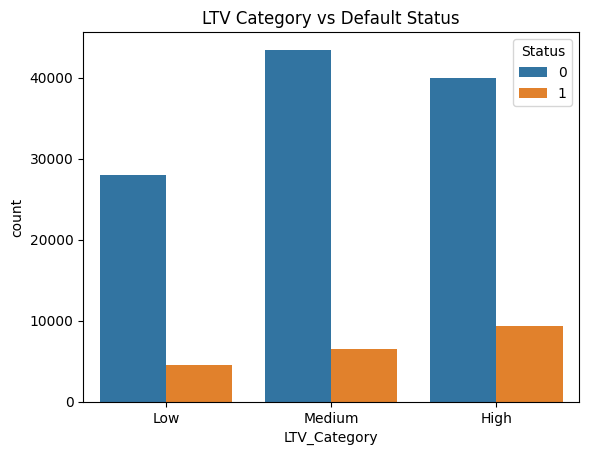

In [ ]:
sns.countplot(x='LTV_Category', hue='Status', data=df)
plt.title('LTV Category vs Default Status')
plt.show()

In [ ]:
# Perform the Chi-Square test
chi2_stat, p_value, dof, ex = chi2_contingency(pd.crosstab(df['LTV_Category'], df['Status']))
print(f"Chi-Square Statistic for LTV: {chi2_stat}, P-value: {p_value}")

Chi-Square Statistic for LTV: 781.0917146067837, P-value: 2.4439327036428862e-170


**Observation**:
 - LTV ratio is a key factor in predicting loan defaults. Borrowers with higher LTV ratios (i.e., borrowing a larger percentage of the property's value) are more likely to default.
 -   As per the graph, high LTV Categories have higher no of defaults

In [ ]:
# Calculate Debt-to-Income Ratio
df['Debt_to_Income_Ratio'] = df['loan_amount'] / df['income']

# Optional: Handle infinite or NaN values if any income is zero or missing
df['Debt_to_Income_Ratio'].replace([float('inf'), -float('inf')], pd.NA, inplace=True)


* Debt_to_Income_Ratio: This feature may help assess a borrower's ability to repay the loan based on their income.

## Recommendations:

**Focus on LTV and DTI Ratios:**
* Include LTV and DTI ratios in credit risk assessments. Borrowers with higher LTV or DTI should be flagged as higher risk and subjected to higher interest rates or stricter repayment terms.

**Personalized Loan Offers Based on Income and Age:**
* Lenders should provide customized loan options depending on a borrower’s age and income. Younger or lower-income borrowers may benefit from extra support or financial advice to improve their loan repayment.

**Adjust Upfront Charges:**
* Lenders should consider increasing upfront charges for riskier loans while keeping them low for safer loans. This can help reduce risk and still attract borrowers.

**Check Credit Scores:**
* Lenders should pay attention to credit scores. Higher scores usually mean lower risk, so they might set stricter rules for borrowers with low scores.